In [ ]:
import math

def get_tasks_for_thread(remainder: int, num_tasks_default: int, thread: int):
    num_tasks = num_tasks_default + 1 if thread < remainder else num_tasks_default
    threads_default = max(thread - remainder, 0)
    threads_default_plus = thread - threads_default
    start = threads_default * num_tasks_default + threads_default_plus * (num_tasks_default + 1)
    end = start + num_tasks - 1
    return num_tasks, start, end

def divide_tasks(tasks: int, threads: int):
    remainder = tasks % threads
    num_tasks_default = math.floor(tasks / threads)
    for thread in range(threads):
        num_tasks, start, end = get_tasks_for_thread(remainder, num_tasks_default, thread)
        print(f"Thread {thread}: tasks {start}-{end}, i.e. {num_tasks} tasks.")        

In [20]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()
entity, project = "joasiee", "convergence_tests"  # set to your entity and project
runs = api.runs(entity + "/" + project)
names, configs, histories = [], [], []

for run in runs:
    if run.state == "finished":
        names.append(run.name)
        configs.append(
            {k: v for k, v in run.config.items()
             if not k.startswith('_')})
        history = run.history().replace('NaN', np.nan).dropna()
        histories.append(history)

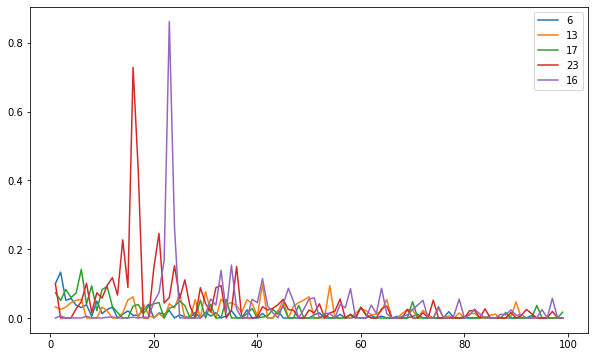

In [25]:
plt.figure(figsize=(10,6))
for i, history in enumerate(histories):
    history["R0/metric_pct"] = history["R0/metric"].pct_change().abs()
    history["R0/metric_pct"].plot.line(label=configs[i]["instance"])
plt.legend()

In [28]:
avg_times = []
cutoff = 80
for history in histories:
    avg_times.append(history.iloc[:cutoff]["R0/time[ms]"].sum() / cutoff / 1000 / 60)

In [29]:
avg_times

[2.0413075624999997,
 1.4367495000000001,
 1.3297762708333332,
 0.9741150208333332,
 0.8524813124999999]

In [2]:
import wandb

api = wandb.Api()
entity, project = "joasiee", "convergence_tests"  # set to your entity and project
runs = api.runs(entity + "/" + project)

for run in runs:
    run.config["resolutions"] = 1
    run.update()

In [7]:
import wandb
import numpy as np

api = wandb.Api()
entity, project = "joasiee", "pareto_front"  # set to your entity and project

for weight0 in np.arange(0.01, 1.01, 0.01):
    for weight1 in np.arange(0.01, 1.01, 0.01):
        weight0 = np.around(weight0, 2)
        weight1 = np.around(weight1, 2)
        # runs = api.runs(entity + "/" + project, filters={"state": {"$in": ["finished", "running"]}, "config.Metric0Weight": float(weight0), "config.Metric1Weight": float(weight1)})
        # exists = len(runs) > 0
        # if not exists:
        #     break
        print(f"{weight0}:{weight1}")


0.01:0.01
0.01:0.02
0.01:0.03
0.01:0.04
0.01:0.05
0.01:0.06
0.01:0.07
0.01:0.08
0.01:0.09
0.01:0.1
0.01:0.11
0.01:0.12
0.01:0.13
0.01:0.14
0.01:0.15
0.01:0.16
0.01:0.17
0.01:0.18
0.01:0.19
0.01:0.2
0.01:0.21
0.01:0.22
0.01:0.23
0.01:0.24
0.01:0.25
0.01:0.26
0.01:0.27
0.01:0.28
0.01:0.29
0.01:0.3
0.01:0.31
0.01:0.32
0.01:0.33
0.01:0.34
0.01:0.35
0.01:0.36
0.01:0.37
0.01:0.38
0.01:0.39
0.01:0.4
0.01:0.41
0.01:0.42
0.01:0.43
0.01:0.44
0.01:0.45
0.01:0.46
0.01:0.47
0.01:0.48
0.01:0.49
0.01:0.5
0.01:0.51
0.01:0.52
0.01:0.53
0.01:0.54
0.01:0.55
0.01:0.56
0.01:0.57
0.01:0.58
0.01:0.59
0.01:0.6
0.01:0.61
0.01:0.62
0.01:0.63
0.01:0.64
0.01:0.65
0.01:0.66
0.01:0.67
0.01:0.68
0.01:0.69
0.01:0.7
0.01:0.71
0.01:0.72
0.01:0.73
0.01:0.74
0.01:0.75
0.01:0.76
0.01:0.77
0.01:0.78
0.01:0.79
0.01:0.8
0.01:0.81
0.01:0.82
0.01:0.83
0.01:0.84
0.01:0.85
0.01:0.86
0.01:0.87
0.01:0.88
0.01:0.89
0.01:0.9
0.01:0.91
0.01:0.92
0.01:0.93
0.01:0.94
0.01:0.95
0.01:0.96
0.01:0.97
0.01:0.98
0.01:0.99
0.01:1.0
0.02:0.01


In [2]:
len(runs)

3